<a href="https://colab.research.google.com/github/Big-Shu-Nim/Coursera_ANN/blob/main/20220209_Training_with_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#01 download the compressed dataset house-or-human.zip
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 123MB/s]


In [ ]:
#02 Unzip the dataset
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

I don't know the next methods and parameters:

-Line 4~6

In [ ]:
import os

#03 Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

#04  Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
#05 the filenames look like in the horses and humans training directories:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10]) #Every Row but columns 0-10

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse46-3.png', 'horse39-4.png', 'horse09-4.png', 'horse08-5.png', 'horse30-0.png', 'horse45-5.png', 'horse11-1.png', 'horse48-7.png', 'horse30-8.png', 'horse20-7.png']
['human04-09.png', 'human04-04.png', 'human13-28.png', 'human14-13.png', 'human05-24.png', 'human12-10.png', 'human07-02.png', 'human14-30.png', 'human11-25.png', 'human06-05.png']


 'os.listdir' :

os.listdir() method in python is used to get the list of all files and directories in the specified directory. If we don’t specify any directory, then list of files and directories in the current working directory will be returned.

In [ ]:
#06 find out the total number of horse and human images in the directories:

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
#06-02 왜 글자수를 반환하는 len함수가 dirtory모든 리스트를 출력시 갯수가 반환되는가?
print(os.listdir(train_horse_dir))
# 리스트 튜플 하나를 글자수 하나로 보는듯 하다. 이렇게치면 모든 리스트의 수가 이미지의 갯수와 동일하게 된다. 

['horse46-3.png', 'horse39-4.png', 'horse09-4.png', 'horse08-5.png', 'horse30-0.png', 'horse45-5.png', 'horse11-1.png', 'horse48-7.png', 'horse30-8.png', 'horse20-7.png', 'horse41-5.png', 'horse16-0.png', 'horse21-6.png', 'horse37-3.png', 'horse11-5.png', 'horse40-3.png', 'horse47-2.png', 'horse23-8.png', 'horse37-5.png', 'horse05-1.png', 'horse47-1.png', 'horse17-1.png', 'horse24-0.png', 'horse25-0.png', 'horse06-2.png', 'horse12-1.png', 'horse43-7.png', 'horse43-6.png', 'horse21-7.png', 'horse06-7.png', 'horse09-5.png', 'horse19-1.png', 'horse26-9.png', 'horse48-2.png', 'horse18-8.png', 'horse01-0.png', 'horse45-0.png', 'horse10-7.png', 'horse33-1.png', 'horse44-9.png', 'horse49-3.png', 'horse47-3.png', 'horse20-3.png', 'horse37-2.png', 'horse18-6.png', 'horse01-2.png', 'horse38-4.png', 'horse27-9.png', 'horse45-2.png', 'horse30-2.png', 'horse14-0.png', 'horse36-9.png', 'horse49-9.png', 'horse10-9.png', 'horse48-8.png', 'horse43-1.png', 'horse10-0.png', 'horse09-8.png', 'horse21-3.pn

In [ ]:
# 07 take a look at a few pictures 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

matplotlib.image :
The image module supports basic image loading, rescaling and display operations.

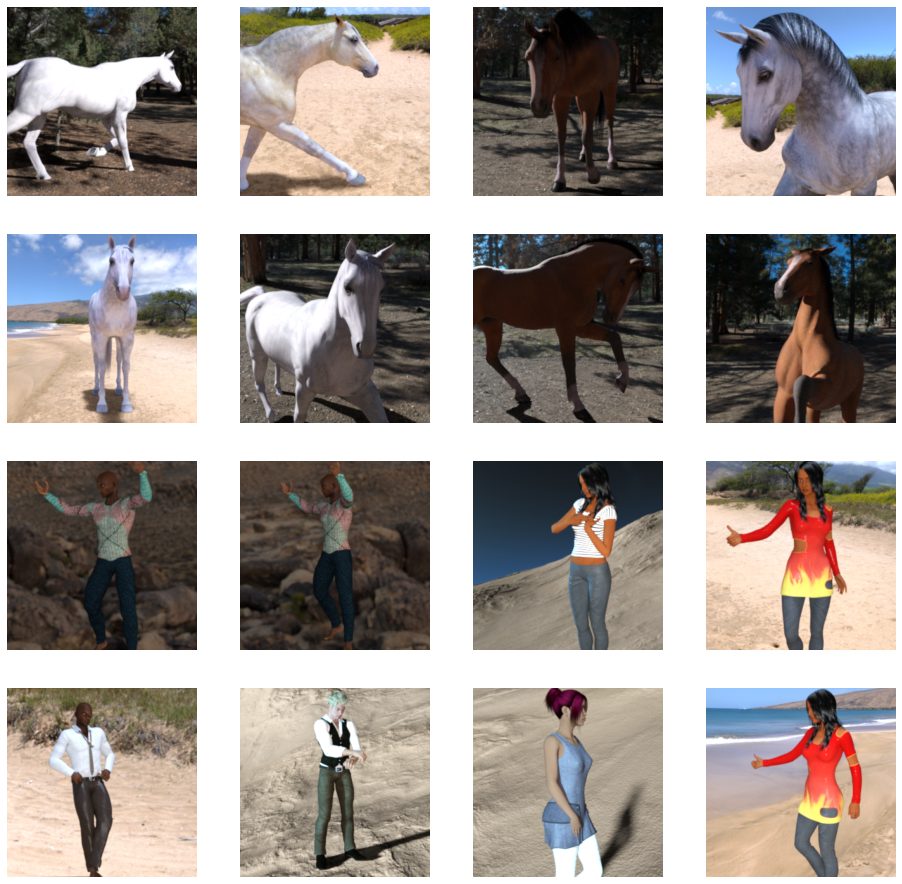

In [ ]:
# 08 Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
#10  Define the model 
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model. compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=0.001),
               metrics=['accuracy'])


DATA PREPROCESSING


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

Found 1027 images belonging to 2 classes.


Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)

Epoch 1/15
8/8 [==============================] - 21s 804ms/step - loss: 1.0187 - accuracy: 0.5350
Epoch 2/15
8/8 [==============================] - 7s 840ms/step - loss: 0.6706 - accuracy: 0.5395
Epoch 3/15
8/8 [==============================] - 8s 935ms/step - loss: 0.8043 - accuracy: 0.6574
Epoch 4/15
8/8 [==============================] - 7s 837ms/step - loss: 0.6511 - accuracy: 0.6963
Epoch 5/15
8/8 [==============================] - 8s 962ms/step - loss: 0.4620 - accuracy: 0.8042
Epoch 6/15
8/8 [==============================] - 7s 842ms/step - loss: 0.3120 - accuracy: 0.8687
Epoch 7/15
8/8 [==============================] - 7s 835ms/step - loss: 0.2828 - accuracy: 0.9088
Epoch 8/15
8/8 [==============================] - 7s 801ms/step - loss: 0.5896 - accuracy: 0.8643
Epoch 9/15
8/8 [==============================] - 8s 919ms/step - loss: 0.3301 - accuracy: 0.9053
Epoch 10/15
8/8 [==============================] - 7s 834ms/step - loss: 0.6827 - accuracy: 0.8220
Epoch 11/15
8/8 [=

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-g4a6f0d0e6_640.jpg to horse-g4a6f0d0e6_640.jpg
[0.00061641]
horse-g4a6f0d0e6_640.jpg is a horse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


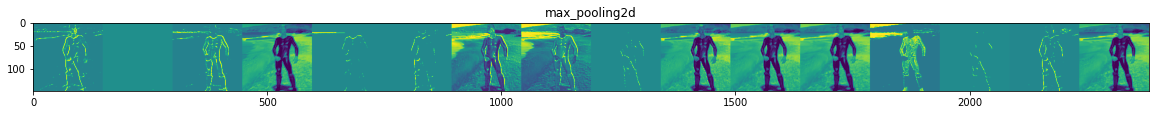

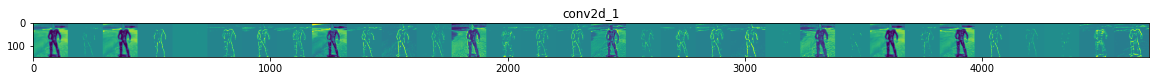

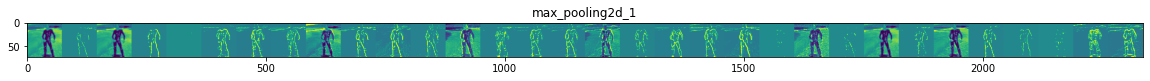

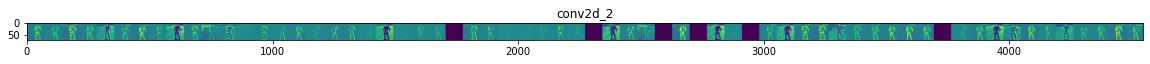

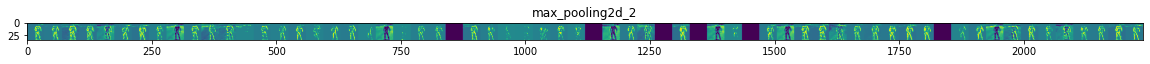

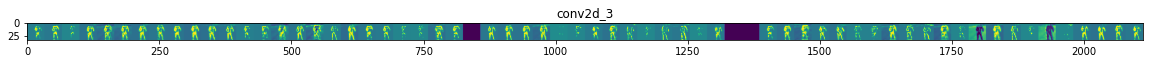

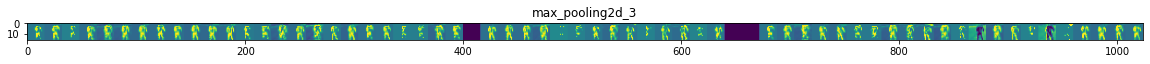

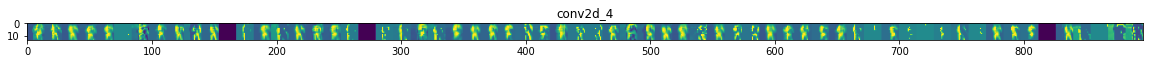

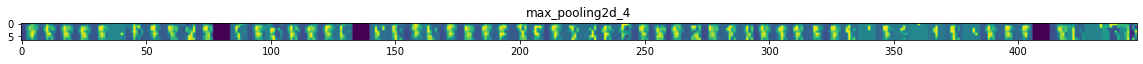